In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels

In [3]:
support_cases = pd.read_csv('/Users/michaelcolellajensen/Desktop/Tableau/cleaned_suportcases_accounts.csv')
recent_sales = pd.read_csv('/Users/michaelcolellajensen/Desktop/Tableau/most_receent_oppertunity.csv')
print(support_cases.shape)
print(recent_sales.shape)

(183669, 23)
(134091, 21)


In [4]:
cases_recent_sales = support_cases.merge(recent_sales,
                                         how = 'inner',
                                         on = 'ACCOUNTKEY')
print(cases_recent_sales.shape)
print(cases_recent_sales.columns)

(180325, 43)
Index(['Unnamed: 0_x', 'STATUS', 'PRIORITY', 'IMPACT', 'ORIGIN', 'PRODUCT',
       'CATEGORY', 'SUBCATEGORY', 'CREATED_DATE', 'CLOSED_DATE',
       'CASE_CLOSED_REASON', 'RECORDTYPE', 'CASE_NUMBER', 'ACCOUNTKEY',
       'ACCOUNTTYPE', 'ACCOUNTTYPEDETAIL', 'EMPLOYEECOUNT', 'THEATER',
       'SUBREGION', 'SEGMENT', 'SUBSEGMENT', 'Tenure', 'Zero.Revenue.Flag',
       'Unnamed: 0_y', 'Unnamed: 0.1', 'CREATEDDATE', 'CLOSEDATE', 'ISUPGRADE',
       'ISCLOSED', 'ISWON', 'NUMBEROFDESKTOPLICENSES', 'NUMBEROFINTERACTORS',
       'NUMBEROFCORES', 'QUANTITY', 'TERMLENGTH',
       'COMPARATIVESALESCREDITAMOUNT', 'ACV', 'PRODUCTTYPE', 'PRODUCTGROUP',
       'PRODUCTSUBCATEGORY', 'IS_INCLUDED_IN_ATTAINMENT', 'OPPORTUNITYID',
       'OPPORTUNITYLINEITEMID'],
      dtype='object')


In [5]:
x_categories = cases_recent_sales[['PRIORITY', 'IMPACT', 'ORIGIN',
                        'PRODUCT', 'CATEGORY', 'RECORDTYPE',
                        'ACCOUNTTYPE',
                        'THEATER', 'SEGMENT']]
x_descrete = cases_recent_sales[['EMPLOYEECOUNT', 'Tenure']]
y = cases_recent_sales['ISWON']
x_onehotencode = pd.get_dummies(x_categories)
x = pd.concat([x_onehotencode, x_descrete], axis= 1)
print(x.head())

   PRIORITY_--None--  PRIORITY_None  PRIORITY_P1  PRIORITY_P2  PRIORITY_P3  \
0                  0              0            0            1            0   
1                  0              0            1            0            0   
2                  0              0            0            0            0   
3                  0              0            0            0            1   
4                  0              0            0            1            0   

   PRIORITY_P4  PRIORITY_P5  PRIORITY_Pre-Support  IMPACT_--None--  \
0            0            0                     0                0   
1            0            0                     0                0   
2            1            0                     0                0   
3            0            0                     0                0   
4            0            0                     0                0   

   IMPACT_Capacity reduced  ...  SEGMENT_Enterprise  \
0                        0  ...                   0   


In [6]:
#logistic regresion 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size= 0.2,
                                                    random_state=123)
log_reg = LogisticRegression()
log_reg.fit(x_train,
            y_train)
log_reg_predictions  = log_reg.predict(x_test)
log_proba = log_reg.predict_proba(x_test)
log_reg_accurracy = log_reg.score(x_test, y_test)
print(log_reg_accurracy)
print(1 - np.mean(y))
log_matrix = confusion_matrix(y_test, log_reg_predictions)
print(log_matrix)
log_reg_coef = (dict(zip(x_train.columns, abs(log_reg.coef_[0]))))
#case details are trash in a logistisc regression.
#can still look for significant variables 

0.715846388465271
0.7189019825315403
[[25817     0]
 [10248     0]]


In [8]:
cases_notes = pd.read_csv('/Users/michaelcolellajensen/Desktop/Tableau/support_cases_text_fact.csv')
cases_notes = cases_notes[['CASE_NUMBER', 'CLOSED_CASE_NOTES']]
accounts = pd.read_csv('/Users/michaelcolellajensen/Desktop/Tableau/cleaned_suportcases_accounts.csv')

case_notes_act = cases_notes.merge(accounts, 
                                     how = 'inner',
                                     on = 'CASE_NUMBER')
print(case_notes_act.shape)

support_cases_sales = case_notes_act.merge(recent_sales, 
                                           how = 'inner',
                                           on = 'ACCOUNTKEY')
print(support_cases_sales.shape)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english',
                                   max_df = 0.9,
                                   max_features = 5000,
                                   ngram_range=(1, 2))
print(support_cases_sales.columns)

(183669, 24)
(180325, 44)
Index(['CASE_NUMBER', 'CLOSED_CASE_NOTES', 'Unnamed: 0_x', 'STATUS',
       'PRIORITY', 'IMPACT', 'ORIGIN', 'PRODUCT', 'CATEGORY', 'SUBCATEGORY',
       'CREATED_DATE', 'CLOSED_DATE', 'CASE_CLOSED_REASON', 'RECORDTYPE',
       'ACCOUNTKEY', 'ACCOUNTTYPE', 'ACCOUNTTYPEDETAIL', 'EMPLOYEECOUNT',
       'THEATER', 'SUBREGION', 'SEGMENT', 'SUBSEGMENT', 'Tenure',
       'Zero.Revenue.Flag', 'Unnamed: 0_y', 'Unnamed: 0.1', 'CREATEDDATE',
       'CLOSEDATE', 'ISUPGRADE', 'ISCLOSED', 'ISWON',
       'NUMBEROFDESKTOPLICENSES', 'NUMBEROFINTERACTORS', 'NUMBEROFCORES',
       'QUANTITY', 'TERMLENGTH', 'COMPARATIVESALESCREDITAMOUNT', 'ACV',
       'PRODUCTTYPE', 'PRODUCTGROUP', 'PRODUCTSUBCATEGORY',
       'IS_INCLUDED_IN_ATTAINMENT', 'OPPORTUNITYID', 'OPPORTUNITYLINEITEMID'],
      dtype='object')


recent_oppertunities = pd.read_csv('/Users/michaelcolellajensen/Desktop/Tableau/most_receent_oppertunity.csv')
support_accounts = pd.read_csv('/Users/michaelcolellajensen/Desktop/Tableau/cleaned_suportcases_accounts.csv')
print(recent_oppertunities.shape)
print(support_accounts.shape)
print(recent_oppertunities.columns)
print(support_accounts.columns)

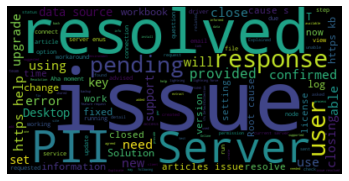

In [25]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
stopwords.update(['Tableau', 'Customer', 'customer','tableau', 'case', 'NAME'])
closed_notes = ''.join(support_cases_sales['CLOSED_CASE_NOTES'].astype('str'))
close_notes_cloud = WordCloud(stopwords = stopwords).generate(closed_notes)
plt.imshow(closed_notes_cloud, interpolation = 'bilinear')
plt.axis('off') 
plt.show()

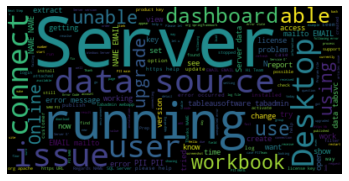

In [29]:
case_text = pd.read_csv('/Users/michaelcolellajensen/Desktop/Tableau/support_cases_text_fact.csv')
stopwords = set(STOPWORDS)
stopwords.update(['trying', 'Tableau', 'need', 'one', 'will', 'used'])
desc_notes = ''.join(case_text['DESCRIPTION'].astype('str'))
desc_notes_cloud = WordCloud(stopwords = stopwords).generate(desc_notes)
plt.imshow(desc_notes_cloud, interpolation = 'bilinear')
plt.axis('off') 
plt.show()

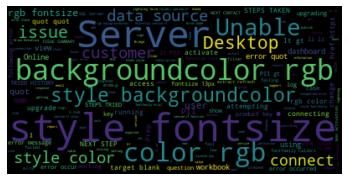

In [32]:
stopwords = set(STOPWORDS)
stopwords.update(['trying', 'Tableau', 'need', 'one', 'will', 'used', 'p', 'span', 'br', 'b', '14px', 'nan'])
issue_notes = ''.join(case_text['ISSUE_SUMMARY'].astype('str'))
issue_notes_cloud = WordCloud(stopwords = stopwords).generate(issue_notes)
plt.imshow(issue_notes_cloud, interpolation = 'bilinear')
plt.axis('off') 
plt.show()

In [50]:
case_text_sales = cases_recent_sales.merge(case_text, 
                                           how='inner',
                                           on= 'CASE_NUMBER')
print(case_text_sales.shape)

(180325, 48)


In [51]:
#tokenization 
from sklearn.feature_extraction.text import TfidfVectorizer
#case_text_sales['DESCRIPTION'] = case_text_sales['DESCRIPTION'].\
    #str.replace('[^a-zA-Z]', ' ').str.lower()
    
tfidf = TfidfVectorizer(max_features= 5000,
                        ngram_range=(1, 2),
                        max_df = 0.9,
                        min_df = 0.01,
                        stop_words='english')
x_text = tfidf.fit_transform(case_text_sales['DESCRIPTION'].astype('str'))
x_df = pd.DataFrame(x_text.toarray(), columns = tfidf.get_feature_names())

y_label = case_text_sales['ISWON']    

/Users/michaelcolellajensen/Library/Python/3.8/lib/python/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 'tableau', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(
/Users/michaelcolellajensen/Library/Python/3.8/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [54]:
#Logreg for text only data
x_train_text, x_test_text, y_train_text, y_test_text = train_test_split(x_df,
                                                                        y_label,
                                                                        test_size=0.2,
                                                                        random_state=123)
log_reg_text = LogisticRegression(max_iter=1000)
log_reg_text.fit(x_train_text, y_train_text)
print(log_reg_text.score(x_train_text, y_train_text))
print(1 - y_label.sum()/ len(y_label))

0.7264383751559684
0.7189019825315403
